In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

In [2]:
data = pd.read_csv("OSA_complete_patients.csv")

In [3]:
data.head()

,Unnamed: 0,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
0,39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
1,41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
2,46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
3,55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
4,56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


## Subset data into dfs for each severity

In [4]:
sev0 = data.drop(data[data.Severity != 0].index)

In [5]:
sev0.head()

,Unnamed: 0,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
3,55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
11,231,135,2.0,41.117043,0.0,0.0,0.0,175.0,63.0,30.0,...,1.0,0.0,1.0,0.0,1.0,0.0,16.0,2.0,0.0,0
27,349,196,2.0,41.278576,0.0,0.0,0.0,162.0,125.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,8.0,0.0,0
29,363,202,2.0,35.474333,0.0,0.0,0.0,169.0,75.0,32.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,2.0,0
30,369,208,2.0,57.426420,0.0,1.0,0.0,166.0,76.0,33.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,21.0,8.0,0


In [6]:
sev1 = data.drop(data[data.Severity != 1].index)
sev2 = data.drop(data[data.Severity != 2].index)
sev3 = data.drop(data[data.Severity != 3].index)

In [7]:
print("Sev0 shape", sev0.shape)
print("Sev1 shape", sev1.shape)
print("Sev2 shape", sev2.shape)
print("Sev3 shape", sev3.shape)

Sev0 shape (2862, 52)
Sev1 shape (5036, 52)
Sev2 shape (5142, 52)
Sev3 shape (8778, 52)


## Explore distribution of continuous variables for each severity

In [8]:
continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 'BMI','Epworth_scale','Pichots_scale','Depression_scale']

### Sev0

<AxesSubplot:xlabel='Depression_scale', ylabel='Count'>

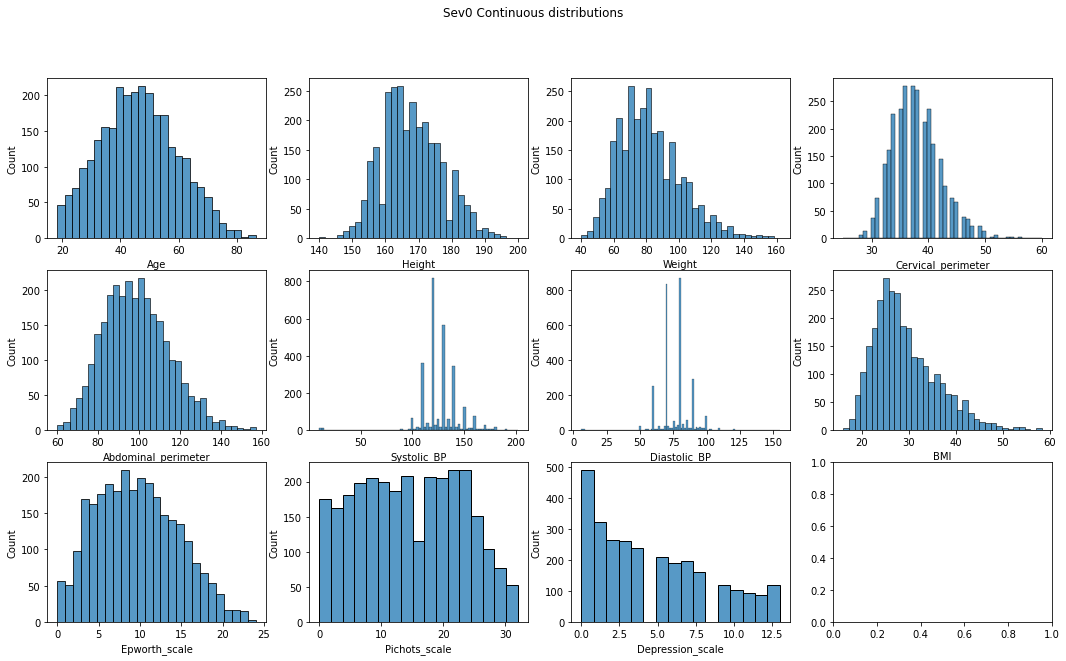

In [9]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

fig.suptitle('Sev0 Continuous distributions')

sns.histplot(ax=axes[0, 0], data=sev0, x='Age')
sns.histplot(ax=axes[0, 1], data=sev0, x='Height')
sns.histplot(ax=axes[0, 2], data=sev0, x='Weight')
sns.histplot(ax=axes[0, 3], data=sev0, x='Cervical_perimeter')
sns.histplot(ax=axes[1, 0], data=sev0, x='Abdominal_perimeter')
sns.histplot(ax=axes[1, 1], data=sev0, x='Systolic_BP')
sns.histplot(ax=axes[1, 2], data=sev0, x='Diastolic_BP')
sns.histplot(ax=axes[1, 3], data=sev0, x='BMI')
sns.histplot(ax=axes[2, 0], data=sev0, x='Epworth_scale')
sns.histplot(ax=axes[2, 1], data=sev0, x='Pichots_scale')
sns.histplot(ax=axes[2, 2], data=sev0, x='Depression_scale')

<AxesSubplot:xlabel='Systolic_BP', ylabel='Count'>

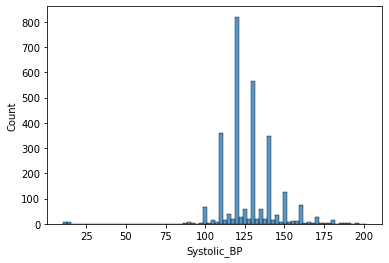

In [10]:
sns.histplot(sev0, x="Systolic_BP")

### Sev1

<AxesSubplot:xlabel='Depression_scale', ylabel='Count'>

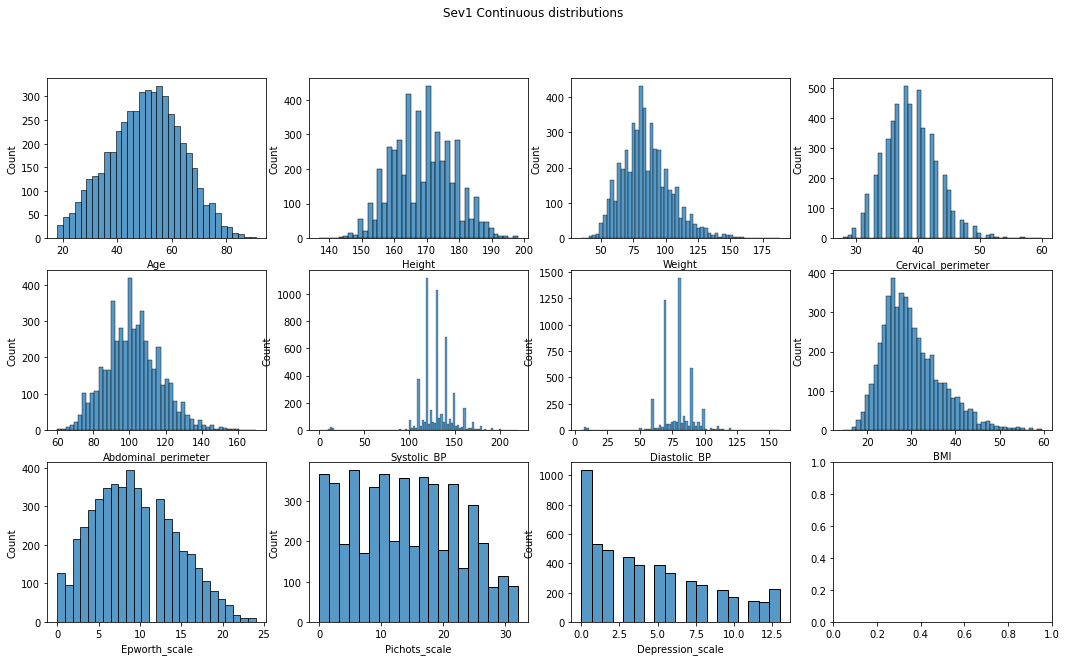

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

fig.suptitle('Sev1 Continuous distributions')

sns.histplot(ax=axes[0, 0], data=sev1, x='Age')
sns.histplot(ax=axes[0, 1], data=sev1, x='Height')
sns.histplot(ax=axes[0, 2], data=sev1, x='Weight')
sns.histplot(ax=axes[0, 3], data=sev1, x='Cervical_perimeter')
sns.histplot(ax=axes[1, 0], data=sev1, x='Abdominal_perimeter')
sns.histplot(ax=axes[1, 1], data=sev1, x='Systolic_BP')
sns.histplot(ax=axes[1, 2], data=sev1, x='Diastolic_BP')
sns.histplot(ax=axes[1, 3], data=sev1, x='BMI')
sns.histplot(ax=axes[2, 0], data=sev1, x='Epworth_scale')
sns.histplot(ax=axes[2, 1], data=sev1, x='Pichots_scale')
sns.histplot(ax=axes[2, 2], data=sev1, x='Depression_scale')

<AxesSubplot:xlabel='Diastolic_BP', ylabel='Count'>

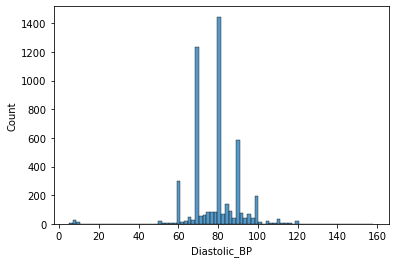

In [12]:
sns.histplot(sev1, x="Diastolic_BP")

### Sev2

<AxesSubplot:xlabel='Depression_scale', ylabel='Count'>

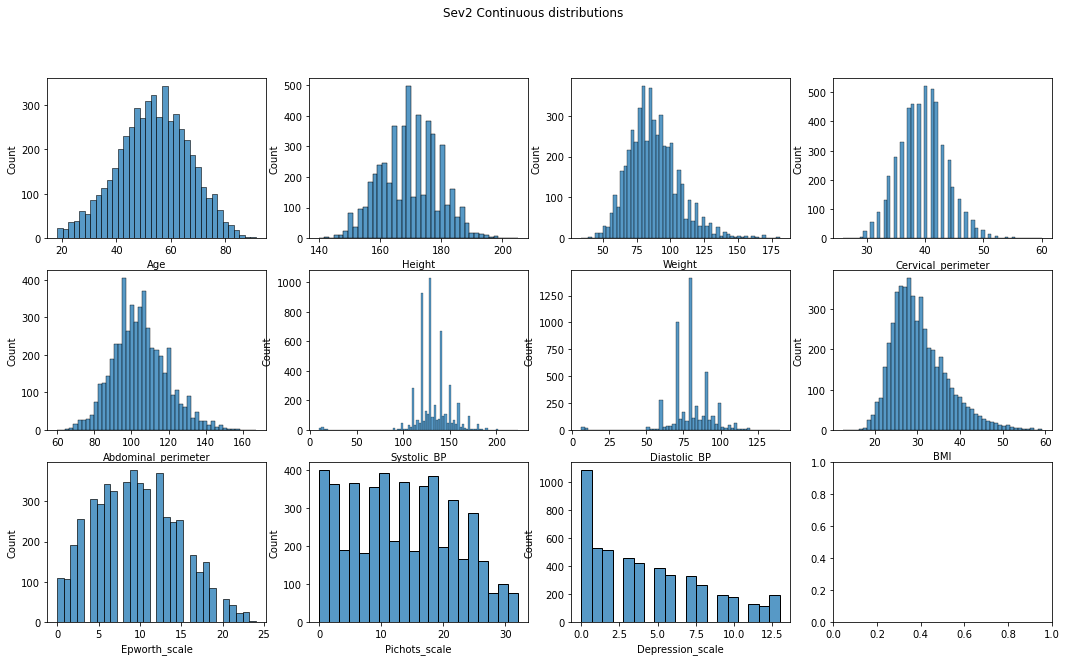

In [13]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

fig.suptitle('Sev2 Continuous distributions')

sns.histplot(ax=axes[0, 0], data=sev2, x='Age')
sns.histplot(ax=axes[0, 1], data=sev2, x='Height')
sns.histplot(ax=axes[0, 2], data=sev2, x='Weight')
sns.histplot(ax=axes[0, 3], data=sev2, x='Cervical_perimeter')
sns.histplot(ax=axes[1, 0], data=sev2, x='Abdominal_perimeter')
sns.histplot(ax=axes[1, 1], data=sev2, x='Systolic_BP')
sns.histplot(ax=axes[1, 2], data=sev2, x='Diastolic_BP')
sns.histplot(ax=axes[1, 3], data=sev2, x='BMI')
sns.histplot(ax=axes[2, 0], data=sev2, x='Epworth_scale')
sns.histplot(ax=axes[2, 1], data=sev2, x='Pichots_scale')
sns.histplot(ax=axes[2, 2], data=sev2, x='Depression_scale')

<AxesSubplot:xlabel='Systolic_BP', ylabel='Count'>

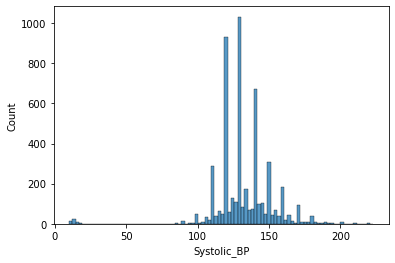

In [14]:
sns.histplot(data=sev2, x='Systolic_BP')

<AxesSubplot:xlabel='Diastolic_BP', ylabel='Count'>

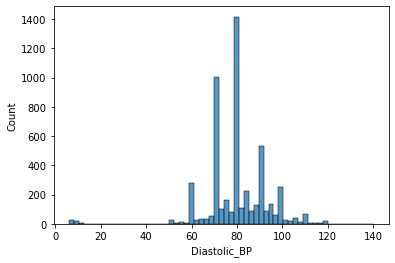

In [15]:
sns.histplot(data=sev2, x='Diastolic_BP')

### Sev3

<AxesSubplot:xlabel='Depression_scale', ylabel='Count'>

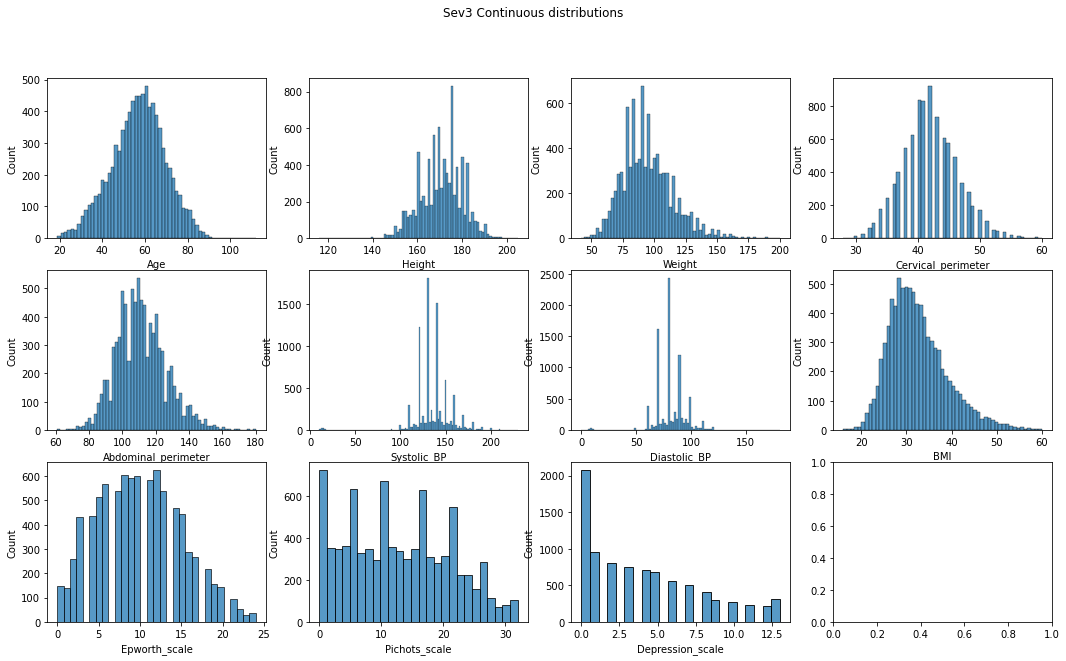

In [16]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

fig.suptitle('Sev3 Continuous distributions')

sns.histplot(ax=axes[0, 0], data=sev3, x='Age')
sns.histplot(ax=axes[0, 1], data=sev3, x='Height')
sns.histplot(ax=axes[0, 2], data=sev3, x='Weight')
sns.histplot(ax=axes[0, 3], data=sev3, x='Cervical_perimeter')
sns.histplot(ax=axes[1, 0], data=sev3, x='Abdominal_perimeter')
sns.histplot(ax=axes[1, 1], data=sev3, x='Systolic_BP')
sns.histplot(ax=axes[1, 2], data=sev3, x='Diastolic_BP')
sns.histplot(ax=axes[1, 3], data=sev3, x='BMI')
sns.histplot(ax=axes[2, 0], data=sev3, x='Epworth_scale')
sns.histplot(ax=axes[2, 1], data=sev3, x='Pichots_scale')
sns.histplot(ax=axes[2, 2], data=sev3, x='Depression_scale')

## Explore distribution of categorical variables for each severity

In [9]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']
continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']
categorical = [i for i in features if i not in continuous]

### Sev0

In [18]:
sev0[categorical].apply(pd.Series.value_counts, normalize=True).round(decimals = 3)

,Sex,Current_smoker,Former_smoker,Sedentary,Maxillofacial_profile,High_BP,Asthma,Rhinitis,COPD,Respiratory_fail,...,Driving_drowsiness,Morning_fatigue,Morning_headache,Memory_problem,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest
0.0,NaN,0.809,0.831,0.893,0.941,0.772,0.856,0.876,0.967,0.991,...,0.513,0.205,0.449,0.893,0.414,0.296,0.522,0.981,0.904,0.696
1.0,0.438,0.191,0.169,0.107,0.059,0.228,0.144,0.124,0.033,0.009,...,0.487,0.795,0.551,0.107,0.586,0.704,0.478,0.019,0.096,0.304
2.0,0.562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sev1

In [19]:
sev1[categorical].apply(pd.Series.value_counts, normalize=True).round(decimals = 3)

,Sex,Current_smoker,Former_smoker,Sedentary,Maxillofacial_profile,High_BP,Asthma,Rhinitis,COPD,Respiratory_fail,...,Driving_drowsiness,Morning_fatigue,Morning_headache,Memory_problem,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest
0.0,NaN,0.816,0.774,0.885,0.933,0.683,0.87,0.889,0.966,0.99,...,0.535,0.222,0.495,0.877,0.433,0.306,0.487,0.977,0.911,0.653
1.0,0.53,0.184,0.226,0.115,0.067,0.317,0.13,0.111,0.034,0.01,...,0.465,0.778,0.505,0.123,0.567,0.694,0.513,0.023,0.089,0.347
2.0,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sev2

In [20]:
sev2[categorical].apply(pd.Series.value_counts, normalize=True).round(decimals = 3)

,Sex,Current_smoker,Former_smoker,Sedentary,Maxillofacial_profile,High_BP,Asthma,Rhinitis,COPD,Respiratory_fail,...,Driving_drowsiness,Morning_fatigue,Morning_headache,Memory_problem,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest
0.0,NaN,0.829,0.721,0.889,0.919,0.624,0.874,0.899,0.959,0.986,...,0.547,0.228,0.513,0.853,0.446,0.308,0.437,0.974,0.915,0.575
1.0,0.615,0.171,0.279,0.111,0.081,0.376,0.126,0.101,0.041,0.014,...,0.453,0.772,0.487,0.147,0.554,0.692,0.563,0.026,0.085,0.425
2.0,0.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sev3

In [21]:
sev3[categorical].apply(pd.Series.value_counts, normalize=True).round(decimals = 3)

,Sex,Current_smoker,Former_smoker,Sedentary,Maxillofacial_profile,High_BP,Asthma,Rhinitis,COPD,Respiratory_fail,...,Driving_drowsiness,Morning_fatigue,Morning_headache,Memory_problem,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest
0.0,NaN,0.831,0.682,0.851,0.931,0.531,0.907,0.912,0.953,0.984,...,0.567,0.252,0.583,0.826,0.485,0.317,0.359,0.974,0.91,0.447
1.0,0.735,0.169,0.318,0.149,0.069,0.469,0.093,0.088,0.047,0.016,...,0.433,0.748,0.417,0.174,0.515,0.683,0.641,0.026,0.09,0.553
2.0,0.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exporting to excel for representation

In [10]:
sev0_cat = sev0[categorical].apply(pd.Series.value_counts, normalize=True)
sev0_cat = pd.DataFrame(sev0_cat)
sev0_cat.to_csv("sev0_cat.csv")

In [11]:
sev1_cat = sev1[categorical].apply(pd.Series.value_counts, normalize=True)
sev1_cat = pd.DataFrame(sev1_cat)
sev1_cat.to_csv("sev1_cat.csv")

In [12]:
sev2_cat = sev2[categorical].apply(pd.Series.value_counts, normalize=True)
sev2_cat = pd.DataFrame(sev2_cat)
sev2_cat.to_csv("sev2_cat.csv")

In [13]:
sev3_cat = sev3[categorical].apply(pd.Series.value_counts, normalize=True)
sev3_cat = pd.DataFrame(sev3_cat)
sev3_cat.to_csv("sev3_cat.csv")

## Mean or median of each feature by severity

#### Means

In [26]:
Cont_sev = data[continuous]
Cont_sev['Severity'] = data['Severity']

C:\Users\amona\AppData\Local\Temp\ipykernel_18668\2010982197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cont_sev['Severity'] = data['Severity']


In [27]:
means = Cont_sev.groupby('Severity').mean()

In [28]:
means

,Age,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,Diastolic_BP,BMI,Epworth_scale,Pichots_scale,Depression_scale
Severity,,,,,,,,,,,
0,46.190933,167.977289,82.042243,37.876310,98.843816,126.952830,76.662823,29.104630,9.559748,14.545772,4.596087
1,50.559220,168.877681,85.266382,38.863582,102.203932,129.899523,78.414019,29.954801,9.267474,13.696386,4.381652
2,53.593944,169.673279,87.577791,39.650720,104.633022,132.288409,79.778880,30.485207,9.510113,13.401206,4.249514
3,56.924998,170.755183,94.727842,41.920996,111.429426,135.907154,81.334131,32.492554,9.951811,12.820118,4.080770


In [29]:
medians = Cont_sev.groupby('Severity').median()

In [30]:
medians

,Age,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,Diastolic_BP,BMI,Epworth_scale,Pichots_scale,Depression_scale
Severity,,,,,,,,,,,
0,45.864476,168.0,80.0,37.0,98.0,125.0,80.0,27.709258,9.0,15.0,4.0
1,51.151266,169.0,83.0,39.0,101.0,130.0,80.0,28.726788,9.0,13.0,4.0
2,53.911020,170.0,85.0,40.0,104.0,130.0,80.0,29.337411,9.0,13.0,3.0
3,57.516769,171.0,92.0,42.0,110.0,135.0,80.0,31.511502,10.0,12.0,3.0


## Association of each feature with severity 

#### Continuous

In [31]:
def kruskall_pval(df):
    p_vals = []
    for feature in continuous:
        p_val = stats.kruskal(*[group[feature].values for name, group in df.groupby("Severity")])[1]
        p_vals.append(p_val)
    return p_vals

In [32]:
k_pvals = kruskall_pval(data)

In [33]:
k_pvals

[0.0,
 4.44099376168646e-65,
 7.317465121233469e-290,
 0.0,
 0.0,
 1.9869514250836194e-195,
 7.25943927041881e-91,
 9.362689288210268e-224,
 3.77328940195192e-13,
 2.117125611604901e-21,
 1.0776770635647259e-11]

#### Categorical

In [34]:
def spearman_pval(df):
    p_vals = []
    for feature in categorical:
        p_val = stats.spearmanr(df[feature], df["Severity"])[1]
        p_vals.append(p_val)
    return p_vals

In [35]:
s_pvals = spearman_pval(data)

In [36]:
s_pvals

[7.386334734880286e-240,
 0.0022832395124492556,
 1.6175577254825504e-65,
 9.39977009002877e-14,
 0.19299233058156146,
 2.5963457270354425e-145,
 4.064955934525886e-18,
 7.345109886853791e-10,
 1.7250210928097534e-05,
 0.00015449304138257777,
 9.742443276834693e-18,
 1.003831252188665e-24,
 1.3221837728926012e-18,
 3.389275036071107e-12,
 2.3895276119518604e-17,
 1.2522905598640778e-05,
 7.485271882495035e-09,
 0.5899533407329935,
 3.927403914567059e-53,
 6.604575650313198e-68,
 1.8215661961907555e-20,
 0.10403630600156402,
 0.7550344681497257,
 0.0003584932944957885,
 0.17542467559759561,
 0.2565630472168411,
 4.962926245493414e-13,
 0.00033215578751745017,
 4.87050084819243e-08,
 1.2710859034682836e-08,
 3.106818273850866e-45,
 6.109519346030652e-26,
 6.886672102150839e-15,
 0.028617761387630416,
 7.066248388050108e-78,
 0.042315287105699,
 0.6458061179110828,
 1.8439482771993076e-189]

In [37]:
all_pvals = k_pvals+ s_pvals
all_pvals = pd.DataFrame(all_pvals)
rows = continuous+categorical
all_pvals.index = rows
all_pvals

,0
Age,0.000000e+00
Height,4.440994e-65
Weight,7.317465e-290
Cervical_perimeter,0.000000e+00
Abdominal_perimeter,0.000000e+00
Systolic_BP,1.986951e-195
Diastolic_BP,7.259439e-91
BMI,9.362689e-224
Epworth_scale,3.773289e-13
Pichots_scale,2.117126e-21


### chisquare

In [39]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [43]:
def chisq(df):
    p_vals = []
    for feature in categorical:
        table = pd.crosstab(df[feature],df['Severity'],margins = False)
        stat, p, dof, expected = chi2_contingency(table)
        p_vals.append(p)
       
    return p_vals


In [44]:
chisq_pvals = chisq(data)
chisq_pvals

[7.31780969382589e-232,
 0.013968399629494269,
 2.480713675773457e-65,
 1.1977022736264674e-14,
 0.0011154312412233827,
 2.449168049831943e-142,
 2.697926323395771e-17,
 2.22479400502241e-08,
 0.0002700213530895452,
 0.002047037707079672,
 3.0876493415727913e-16,
 7.930707329852855e-23,
 4.355147169217187e-17,
 4.045748483526853e-11,
 1.695922306679543e-15,
 7.172739186840956e-05,
 2.3358963969348128e-11,
 0.4486850128218891,
 1.5201786934882932e-50,
 1.509784604333934e-66,
 1.372981685687545e-18,
 0.04549195871374038,
 0.646584300363892,
 3.7231288232091816e-05,
 0.3787791657136492,
 0.4684094884172205,
 6.831812177646973e-12,
 0.0004974550942017762,
 1.0476450618788613e-06,
 2.54107371915492e-07,
 5.720861256368884e-44,
 7.033904917711792e-24,
 2.3126486277395763e-13,
 0.16756831330798722,
 6.728522362197566e-75,
 0.13861090892196473,
 0.39833672258817165,
 2.487840955036533e-184]

In [45]:
all_pvals = k_pvals+ chisq_pvals
all_pvals = pd.DataFrame(all_pvals)
rows = continuous+categorical
all_pvals.index = rows
all_pvals

,0
Age,0.000000e+00
Height,4.440994e-65
Weight,7.317465e-290
Cervical_perimeter,0.000000e+00
Abdominal_perimeter,0.000000e+00
Systolic_BP,1.986951e-195
Diastolic_BP,7.259439e-91
BMI,9.362689e-224
Epworth_scale,3.773289e-13
Pichots_scale,2.117126e-21
